## Import Libraries & Load Dataset

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

## Gender Recognition Dataset

In [2]:
image_generator = ImageDataGenerator(
    rescale = 1.0 / 255.0,
    zoom_range = 0.2,
    shear_range = 0.2,
    rotation_range = 10,
    horizontal_flip = True
)
image_generator_val = ImageDataGenerator(
    rescale = 1.0 / 255.0
)

In [3]:
path_train = "../input/gender-recognition-200k-images-celeba/Dataset/Train"
path_val = "../input/gender-recognition-200k-images-celeba/Dataset/Validation"
path_test = "../input/gender-recognition-200k-images-celeba/Dataset/Test"
Train = image_generator.flow_from_directory(
    path_train,
    class_mode = "categorical",
    target_size = (224,224),
    batch_size = 32
)
Val = image_generator_val.flow_from_directory(
    path_val,
    class_mode = "categorical",
    target_size = (224,224),
    batch_size = 32
)
Test = image_generator_val.flow_from_directory(
    path_test,
    class_mode = "categorical",
    target_size = (224,224),
    batch_size = 32
)

Found 160000 images belonging to 2 classes.
Found 22598 images belonging to 2 classes.
Found 20001 images belonging to 2 classes.


# Model
## CNN

In [10]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32,activation="relu"))
model.add(Dense(2,activation="softmax"))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization_2 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_3 (Batch (None, 112, 112, 64)      256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200704)           

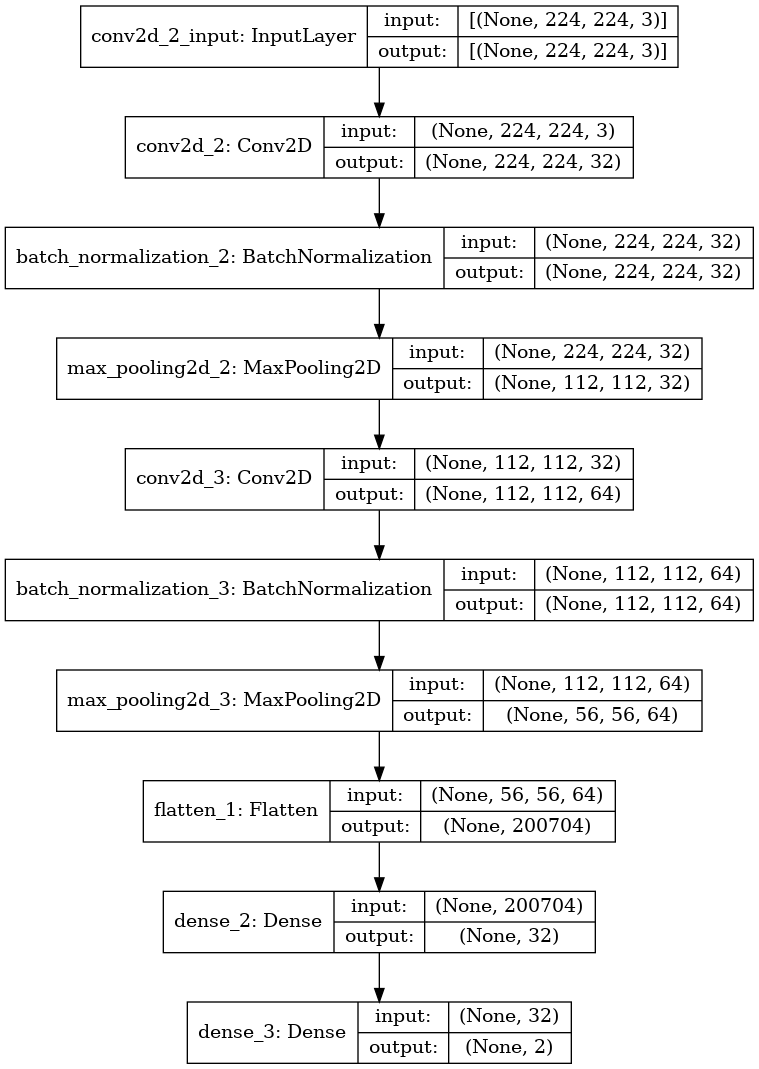

In [12]:
plot_model(model,show_shapes=True)

In [13]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
checkpoint = ModelCheckpoint("Gender.h5",monitor="val_accuracy",mode="max",save_best_only=True)

In [14]:
history = model.fit(Train,
                   epochs=5,
                   validation_data=Val,
                   callbacks=[checkpoint])

Epoch 1/5
5000/5000 [==============================] - 1886s 377ms/step - loss: 0.2137 - accuracy: 0.9188 - val_loss: 22.6047 - val_accuracy: 0.6759
Epoch 2/5
5000/5000 [==============================] - 1872s 374ms/step - loss: 0.1435 - accuracy: 0.9437 - val_loss: 0.1655 - val_accuracy: 0.9423
Epoch 3/5
5000/5000 [==============================] - 1904s 381ms/step - loss: 0.1302 - accuracy: 0.9523 - val_loss: 0.0889 - val_accuracy: 0.9668
Epoch 4/5
5000/5000 [==============================] - 1853s 371ms/step - loss: 0.1112 - accuracy: 0.9578 - val_loss: 2.0023 - val_accuracy: 0.9099
Epoch 5/5
5000/5000 [==============================] - 1841s 368ms/step - loss: 0.1108 - accuracy: 0.9582 - val_loss: 0.0963 - val_accuracy: 0.9621


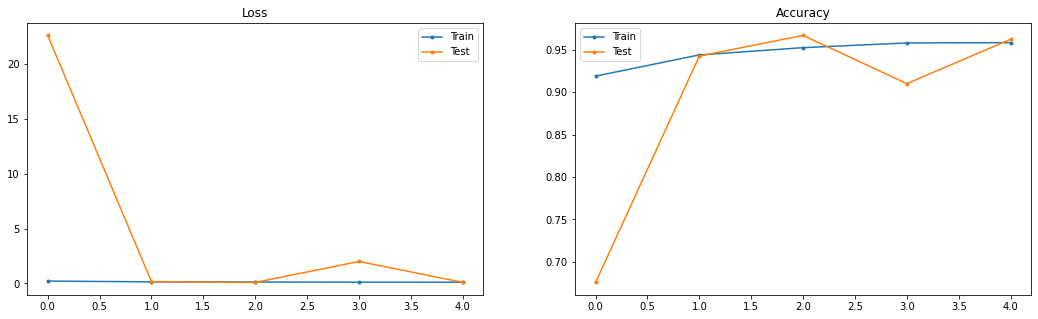

In [15]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(18,5))
ax1.set_title("Loss")
ax2.set_title("Accuracy")
ax1.plot(history.history["loss"],label="Train",marker=".")
ax1.plot(history.history["val_loss"],label="Test",marker=".")
ax2.plot(history.history["accuracy"],label="Train",marker=".")
ax2.plot(history.history["val_accuracy"],label="Test",marker=".")
ax1.legend()
ax2.legend()
plt.show()

In [16]:
model.evaluate(Test)

626/626 [==============================] - 168s 269ms/step - loss: 0.0874 - accuracy: 0.9663


[0.08739076554775238, 0.966301679611206]